### Visualization of different features of used Audi cars

**Dataset**: Dataset of used Audi cars along with their feature such as
1. **model**- model of the car
2. **year**	- year of manufacturing 
3. **price**- price of the used car
4. **transmission**- transmission mode of the car
4. **mileage**- mileage of the car
5. **fuelType**- type of fuel the car runs on 	
6. **mpg**-	mile covered by the car per gallon of fuel 
7. **engineSize**- engine size of the car

### Importing the libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the csv file for importing dataset of used Audi cars

In [2]:
df=pd.read_csv("audi.csv")

#display the dataset ; top 6 observations are displayed here
display(df.head(6))

#look into the dataset to find out missing/incorrect values,observation and column number, variable types, etc  
# display(df.info())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,49.6,1.0
5,A1,2016,13900,Automatic,32260,Petrol,58.9,1.4


### A function for counting cars of each category

In [3]:
def counting(data,column):

    #count of each feature ; results in a series with feature as index
    feature=df[column].value_counts()

    #reassigning the series as a dataframe
    feature=pd.DataFrame(feature)

    #resetting index
    feature=feature.reset_index()

    #renaming the index using dictionary
    feature=feature.rename(columns={'index':column,column:'no. of cars'})

    #percentage of cars    
    feature['% of cars'] = ((feature['no. of cars']/feature['no. of cars'].sum())*100)
    #rounding percentage to two place of decimal
    feature['% of cars'] = np.round(feature['% of cars'], 2)

    #return as an output of the function
    return feature

In [4]:
##function run for each feature
model=counting(df,'model')
year=counting(df, 'year')
fuelType=counting(df, 'fuelType')
transmission=counting(df, 'transmission')

##number of unique value of each feature 
# print(len(df['model'].unique()))
# print(len(year))
# print(len(fuelType))
# print(len(df['transmission'].unique()))

### Function for plotting the graph/barplot

In [5]:
def barplot (data,axis_x,color,rotation):
    
    #a barplot using seaborn
    #sequence of parameters>> seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, color=None, palette=None)
    #alpha=0 to 1 for changing transparency)
    sns.barplot(x=axis_x,y='% of cars',data=data,color=color,alpha=0.75)
    
    #title for each barplot
    plt.title("\ntotal no. of cars for each "+ axis_x)
    
    #y label of the barplot
    plt.ylabel("\n% of cars")
    
    #x label of the barplot
    plt.xlabel(axis_x)
    
    #rotation for the x label markings/xticks
    plt.xticks(rotation=rotation)
    
    # setting range for y label markings/yticks
    #plt.yticks(yticks)
    #add yticks as input parameter in barplot function


### Barplot


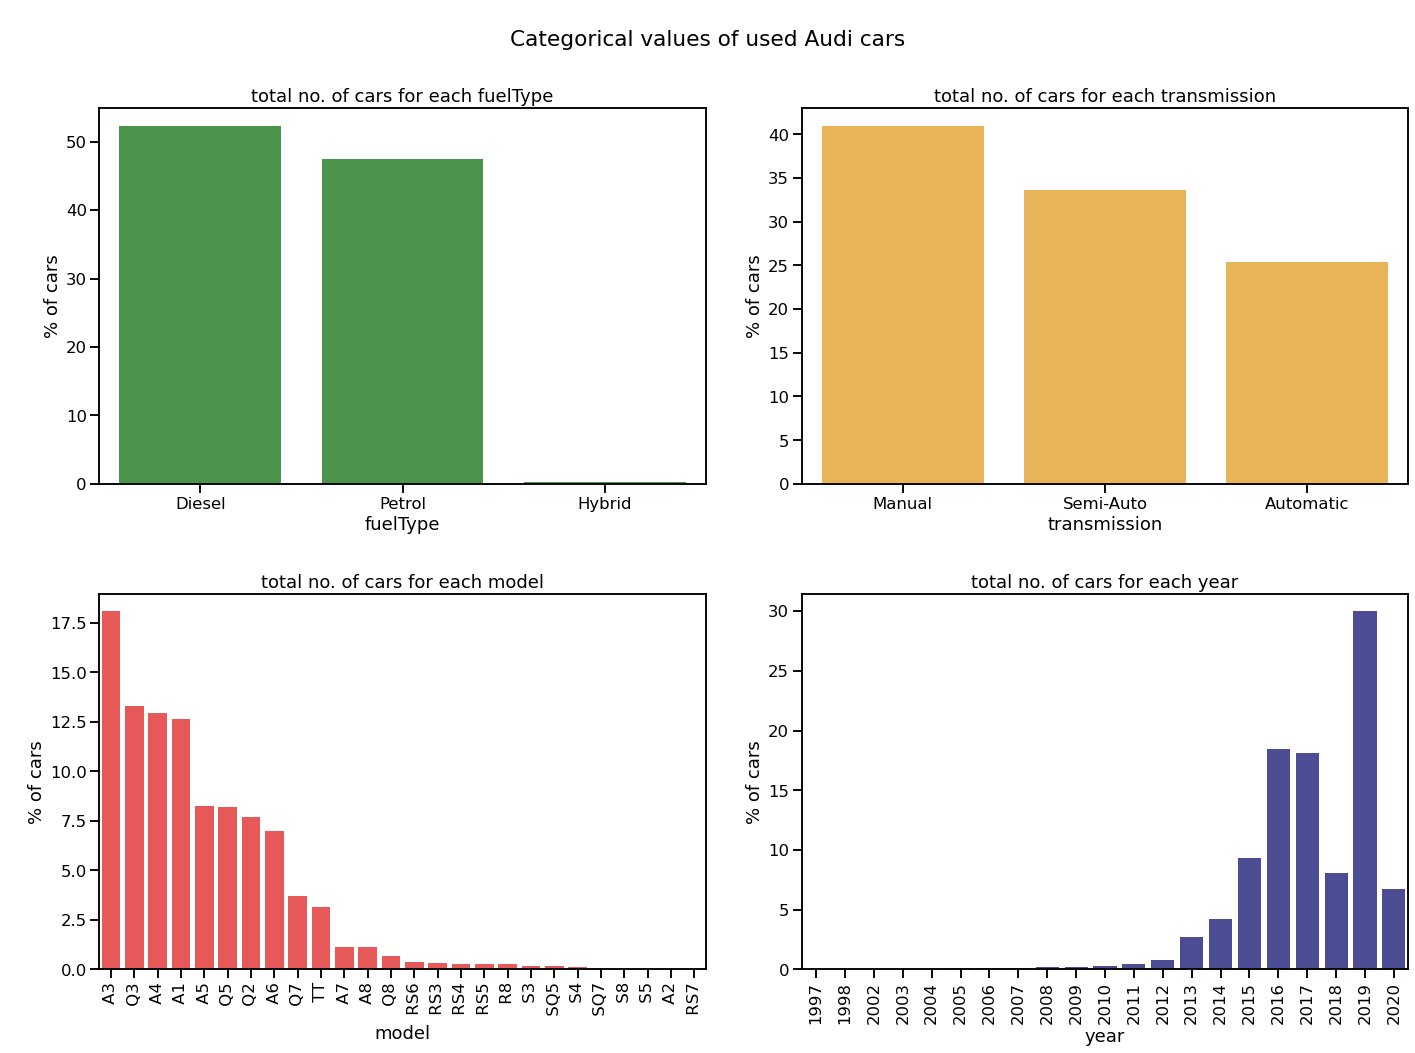

In [6]:
#context parameters used to change size of the labels, lines, and other elements of the graph
#options are-paper(.8), notebook(1.1), talk(1.3), poster(1.6)
sns.set_context('talk')

#customize dimension of the whole graph
plt.figure(figsize=(20,15))

#title of the whole set of barplots 
plt.suptitle("\nCategorical values of used Audi cars")

#subplotting- displaying two or more plots together in rows and columns
#command pattern>> plt.subplot(no of rows,no of column, position of the plot-(1,2,3,...))

#row 1, column 1 
plt.subplot(2,2,3)
#calling function barplot, input for: data -model, axis_x -'model',color -r(red), rotation for xlabel -90 degrees
barplot(model,'model','r',90)
# barplot(model,'model','r',90)

#row 1, column 2 
plt.subplot(2,2,4)
#function barplot, input for: data -year, axis_x -'year',color -b(blue), rotation for xlabel -90 degrees
barplot(year,'year','navy',90)

#row 2, column 1 
plt.subplot(2,2,1)
#function barplot, input for: data -fuelType, axis_x -'fuelType',color -g(green), rotation for xlabel -0(no rotation)
barplot(fuelType,'fuelType','g',0)

#row 2, column 2
plt.subplot(2,2,2)
#function barplot, input for: data -transmission, axis_x -'transmission',color -orange, rotation for xlabel -0(no rotation)
barplot(transmission,'transmission','orange',0)

#to avoid overlapping of title and label of multiple graphs
plt.tight_layout()
#remove extra statements around the graph
plt.show()

1.The 1st barplot shows percentage of cars for fueltype i.e diesel, petrol and hybrid indvidually.

2.The 2nd barplot shows percentage of cars for manual, semi-auto and automatic transmission type.

3.The 3rd barplot shows percentage of cars for each model.

4.The 4tt barplot shows percentage of cars for each year of manufacturing.

### Pairplot to get a summary for further visual analysis

In [7]:
# #pairplot function- Plot pairwise relationships in a dataset
# #kind{‘scatter’, ‘kde’, ‘hist’, ‘reg’} ; diag_kind{‘auto’, ‘hist’, ‘kde’, None} ; corner- false(repeat similar relation) 
# #markers- shapes of the points
# sns.pairplot(df,corner=True, hue='fuelType',markers=',')
# plt.show()

### Scatterplot, Regression line

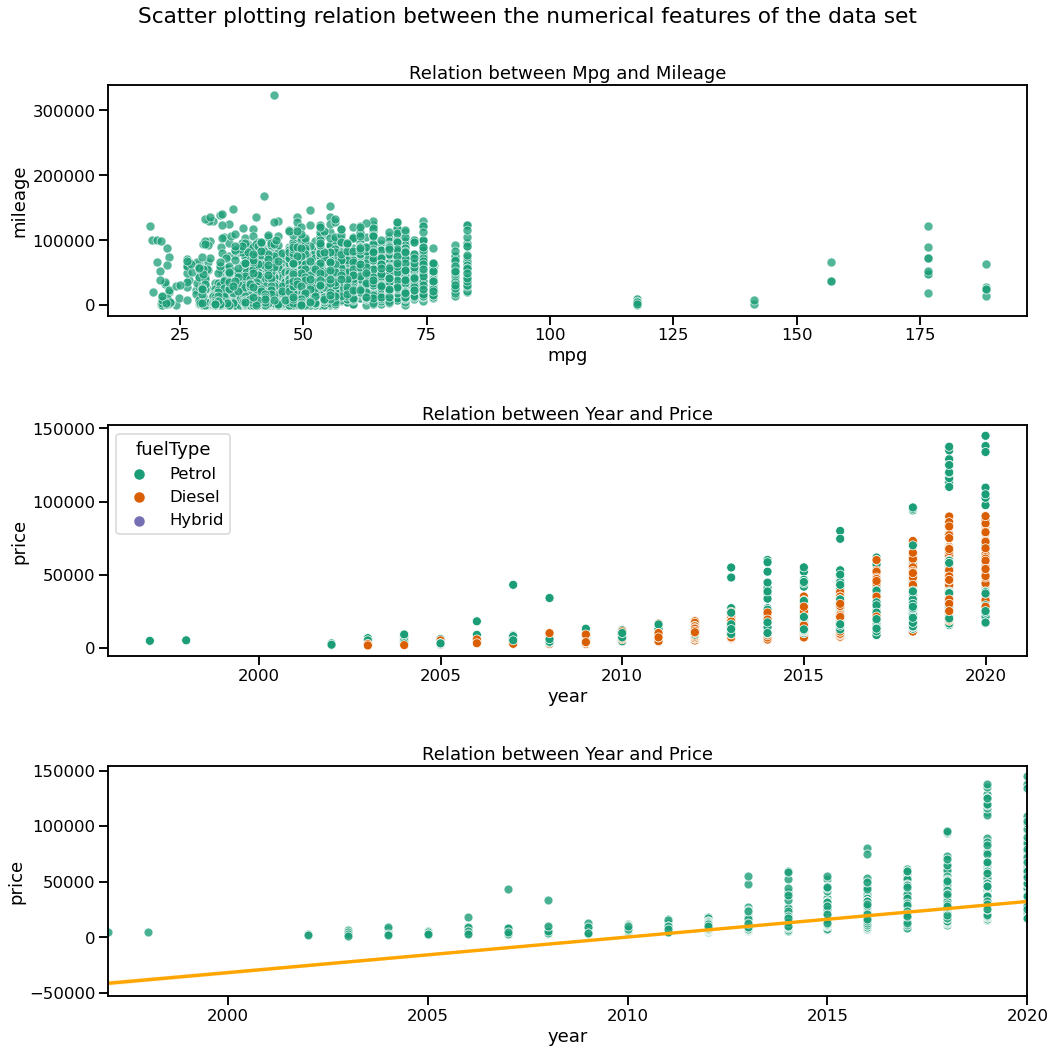

In [8]:
sns.set_context('talk')
sns.set_palette("Dark2")
plt.figure(figsize=(15,15))

plt.suptitle("Scatter plotting relation between the numerical features of the data set")
plt.subplot(3,1,1)

#scatterplot pattern>>(x,y,dataset)
#numerical variable goes in x and y axis

#a scatterplot showing relation between mpg and mileage 
plt.title("\nRelation between Mpg and Mileage")
sns.scatterplot(x='mpg',y='mileage',data=df,alpha=0.75)

plt.subplot(3,1,2)
#a scatterplot showing relation between year and price while categorizing on the basis of the fuelType
#hue parameter for utilizing categorical variable(more than 3/4 categorical variables hampers plot's explainability)
plt.title("\nRelation between Year and Price")
sns.scatterplot(x='year',y='price',data=df,hue='fuelType')

plt.subplot(3,1,3)
#regressionplot-a scatterplot showing relation between year and price with a regression line
plt.title("\nRelation between Year and Price")
#scatter/line_kws is used to customize either of them
#edgecolor- color of the circumference of the scatter dots; linestyle- solid,dotted,dashed,dashdot
sns.regplot(x='year',y='price',data=df,scatter_kws={'edgecolor':'white'},line_kws={'linestyle':'solid','color':'orange'})

plt.tight_layout()
plt.show()

1.From the first figure, a scatterplot showing the relation between mpg and mileage, we cannot derive any correlation between the two features. The points are clustering in a certain region, showing no dependancy of one with the other variable.

2.From the second figure, a scatterplot showing the relation between year and price, we can assume a proportional relation between the two features. The variables are showing positive changes with the one another. The hue confirms that the relation is similar for all the fueType cars.

3.From the third figure, a regression line is added to the second scatterplot, it clearly shows that there is a positive correlation between year and price. Though the regression line shows that the price of the cars before a certain year has a negative resale value, which isn't possible, we can primarily conclude that the price of the car increases with the passing year.

### Statistical summary of the dataset for each column/feature

In [9]:
#describe- provides summary statistics of the Dataframe(/series)
df.describe()

,year,price,mileage,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,188.300000,6.300000


### Histogram, Distribution plot, ECDF

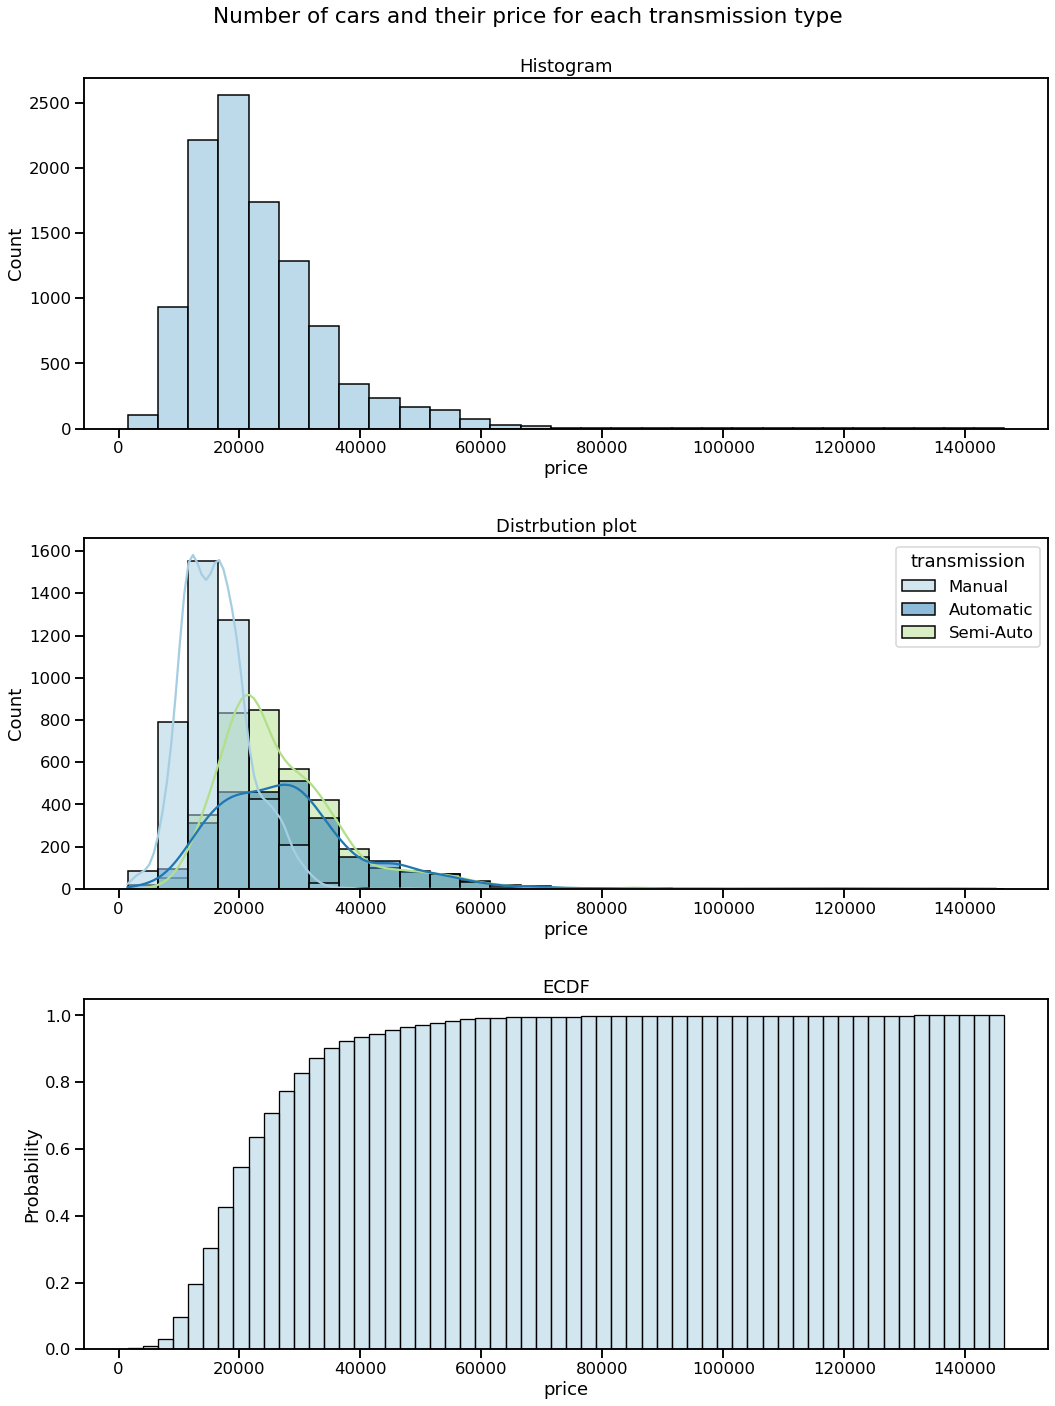

In [10]:
plt.figure(figsize=(15,20))
#color pallete for selecting a set of color
sns.set_palette("Paired")
plt.suptitle("Number of cars and their price for each transmission type")

plt.subplot(3,1,1)
plt.title("\nHistogram")
# m binwidth- the data is graphed in groups of 'm' wide unit on x axis.
sns.histplot(data=df,x='price',binwidth=5000, fill=True)

plt.subplot(3,1,2)
plt.title("\nDistrbution plot")
# kde- parameter used for the distribution curve
sns.histplot(data=df,x='price',binwidth=5000, kde=True, hue='transmission')

plt.subplot(3,1,3)
plt.title("\nECDF")
# stat- count, frequency, density, probability- variable for y axis
sns.histplot(data=df,x='price',binwidth=2500, alpha=0.5, cumulative=True,stat='probability')

plt.tight_layout()
plt.show()

1.The first figure is a basic histogram drawn for all the cars and their price for a price interval of 5000. 

2.The second figure is a distribution plot for cars and their price of each transmission type. From the distribution it can be assumed that most of the cars of manual cars were sold for around 15000, semi- auto cars for 20000 and automatic cars for 30000 approximately.

3.The third graph is a empirical cumulative distribution function (CDF) graph of price of used AUDI cars. From the graph we can derive the probability of price at a certain point. For example, the probability of the price being less than or equal to $30000 is almost 40%

#### Boxplot and Violinplot function

In [11]:
#boxplot/violinplot(y=df[numerical variable],x=df[categorcal var],showfliers=False(remove outliers),hue=df[categorical var])
def boxviolin(f1,f2,hue):
    plt.suptitle("Boxplot and Violinplot of used Audi cars dataset")
    sns.set_palette("Dark2")
    plt.subplot(2,1,1)
    plt.title("Boxplot")    
    sns.boxplot(y=df[f1],x=df[f2], showfliers=False, hue=df[hue])
    plt.subplot(2,1,2)
    plt.title("\nViolinplot")
    sns.violinplot(y=df[f1],x=df[f2], showfliers=False, hue=df[hue])
    plt.tight_layout()
    plt.show()

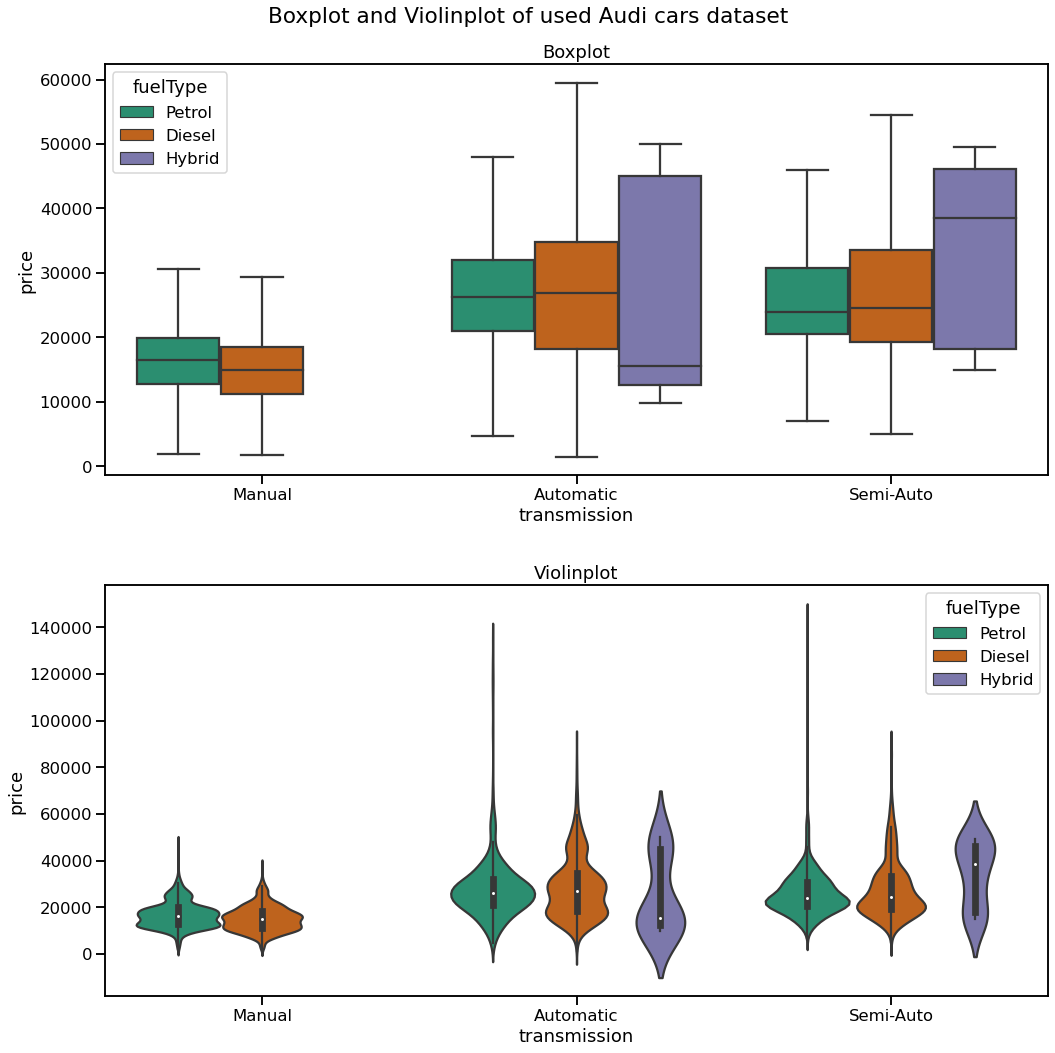

In [12]:
plt.figure(figsize = (15,15))
boxviolin('price','transmission','fuelType')

##### Boxplot and violinplot provides the following statistical information of the dataset: 
1. Minimum value, Maximum value,Range= max-min value
2. First quartile(25th percentile), median(50th percentile), third quartile(75th percentile) 
3. IQR(inter-quartile range)= third quartile - first quartile

#### Boxplot- For automatic,hybrid cars 
1. Min price: 10000, Max price: 50000, Range: 40000
2. 25th percentile: 14000, 50th percentile: 16000, 75th percentile: 45000;; since 50th percential(median) is around 16000, maximum of the sold car prices are around 16000
3. Prices of the sold car are mostly between 14000 to 45000 usd

#### Violinplot-For Semi-auto, petrol run cars
1. Min price: 5000, Max price: 45000, Range: 40000
2. 25th percentile: 20000, 50th percentile: 24000, 75th percentile: 32000;; since 50th percential(median) is around 24000, maximum of the sold car prices are around 24000
3. Prices of the sold car are mostly between 20000 to 32000 usd

##### Violinplot is better graphical representation of the statistical measures of the dataset ; 